# Proyek Analisis Data: Bike Sharing
- Nama: Krisna Malik Sukarno
- Email: krisnamalik@gmail.com
- Id Dicoding: Krisna

## Menentukan Pertanyaan Bisnis

- Bagaimana Cuaca Mempengaruhi Aktivitas Rental Sepeda?
- Apakah ada perbedaan perilaku harian antara Casual User dan Registered User?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

melihat properti dari dataset




In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


melihat apakah ada missing value dari dataset

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

melihat apakah ada data yang terduplikasi

In [ ]:
day_df.duplicated().sum()

0

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
hour_df.duplicated().sum()

0

### Cleaning Data

mengubah data type dteday menjadi date time format

In [ ]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

mengevaluasi dataset

In [ ]:
day_df.describe(include="all")

<ipython-input-9-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [ ]:
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [ ]:
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


penggabungan dataset menggunakan dteday sebagai kunci

In [ ]:
bike_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
bike_df.head(25)

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
5,6,2011-01-01,1,0,1,5,0,6,0,2,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
6,7,2011-01-01,1,0,1,6,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
7,8,2011-01-01,1,0,1,7,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
8,9,2011-01-01,1,0,1,8,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
9,10,2011-01-01,1,0,1,9,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [ ]:
bike_df.to_csv("bike.csv", index=False)

grouping berdasarkan jam penggunaan atau penyewaan; melihat bagaimana sebaran data penggunaan sepeda pada setiap jam

In [ ]:
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

grouping berdasarkan musim; melihat berapa banyak record sepeda yang disewa pada setiap musimnya

In [ ]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

grouping berdasarkan cuaca dari registered user; melihat bagaimana penggunaan sepeda oleh registered user pada cuaca yang berbeda

In [ ]:
day_df.groupby(by="weathersit").registered.sum().sort_values(ascending=False)

weathersit
1    1811606
2     827082
3      33974
Name: registered, dtype: int64

grouping berdasarkan hari dari casual user; melihat sebaran pengguanaan sepeda oleh casual user berdasarkan hari dalam minggu

In [ ]:
day_df.groupby(by="weekday").casual.sum().sort_values(ascending=False)

weekday
6    153852
0    140521
5     78238
1     70784
4     61460
2     57843
3     57319
Name: casual, dtype: int64

grouping berdasarkan nilai temperatur; melihat bagaimana pengaruh temperatur terhadap record penyewaan sepeda

In [ ]:
day_df.groupby(by="temp").instant.nunique().sort_values(ascending=False)

temp
0.265833    5
0.635000    5
0.680000    4
0.710833    4
0.649167    4
           ..
0.390000    1
0.389167    1
0.389091    1
0.384348    1
0.861667    1
Name: instant, Length: 499, dtype: int64

grouping berdasarkan musim dari rerata nilai temperatur; melihat rerata temperatur pada setiap musim

In [ ]:
day_df.groupby(by="season").temp.mean().sort_values(ascending=False)

season
3    0.706309
2    0.544405
4    0.422906
1    0.297748
Name: temp, dtype: float64

grouping berdasarkan bulan dari rerata casual user; melihat sebaran rerata penggunaan sepeda yang dilakukan oleh casual user berdasarkan bulan

In [ ]:
day_df.groupby(by="mnth").casual.mean()

mnth
1      194.225806
2      262.508772
3      716.838710
4     1013.366667
5     1214.274194
6     1231.766667
7     1260.596774
8     1161.919355
9     1172.050000
10     963.870968
11     610.050000
12     349.887097
Name: casual, dtype: float64

grouping berdasarkan bulan dari rerata registered user; melihat sebaran rerata penggunaan sepeda yang dilakukan oleh registered user berdasarkan bulan

In [ ]:
day_df.groupby(by="mnth").registered.mean()

mnth
1     1982.112903
2     2392.789474
3     2975.419355
4     3471.533333
5     4135.500000
6     4540.600000
7     4303.080645
8     4502.500000
9     4594.466667
10    4235.354839
11    3637.133333
12    3053.919355
Name: registered, dtype: float64

grouping berdasarkan hari kerja dari total casual user; melihat total casual user yang menggunakan sepeda pada hari kerja

In [ ]:
day_df.groupby(by="workingday").casual.sum()

workingday
0    316732
1    303285
Name: casual, dtype: int64

grouping berdasarkan tanggal dari total casual user; melihat total penggunaan sepeda oleh casual user per-harian

In [ ]:
day_df.groupby(by="dteday").casual.sum()

dteday
2011-01-01    331
2011-01-02    131
2011-01-03    120
2011-01-04    108
2011-01-05     82
             ... 
2012-12-27    247
2012-12-28    644
2012-12-29    159
2012-12-30    364
2012-12-31    439
Name: casual, Length: 731, dtype: int64

Perbandingan antara Casual dan Registered User berdasarkan hari;

Karena total casual user yang menggunakan sepeda saat hari libur (day 6,0,5) lebih banyak dibandingkan hari lain, maka perlu dilihat pola penggunaan sepeda casual user dan registered user, apakah ada perbedaan pola dalam penggunaan sepeda setiap harinya

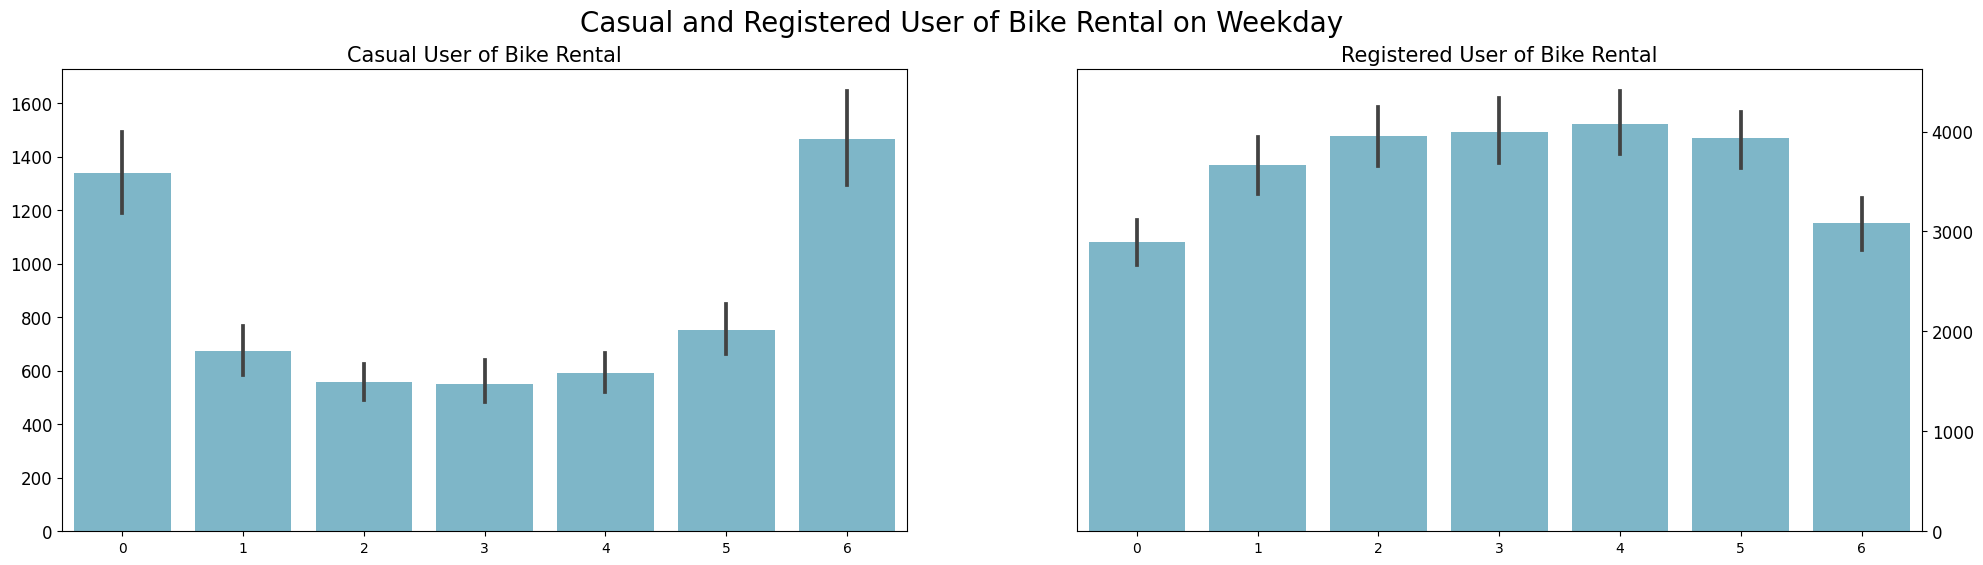

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(x="weekday", y="casual", data=day_df, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User of Bike Rental", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="weekday", y="registered", data=day_df, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User of Bike Rental", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Casual and Registered User of Bike Rental on Weekday", fontsize=20)
plt.show()

Perbandingan antara Casual dan Registered User berdasarkan cuaca

Karena total penggunaan sepeda oleh registered user sangat berkurang signifikan pada cuaca kategori 3. Menarik jika kita membandingkan perilaku antara registered dan casual user berdasarkan cuaca. Apakah pola perilakunya sama pada setiap cuaca?

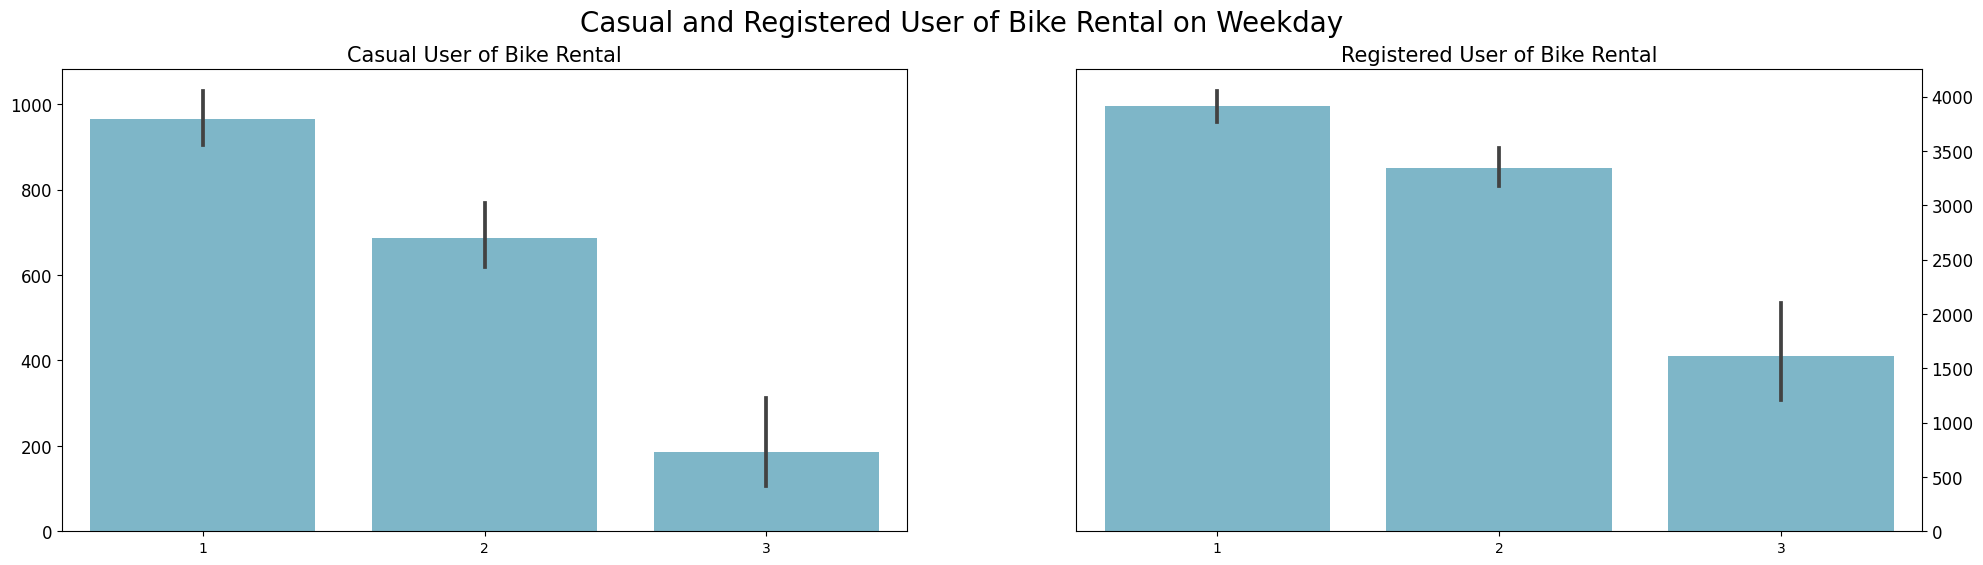

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(x="weathersit", y="casual", data=day_df, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User of Bike Rental", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="weathersit", y="registered", data=day_df, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User of Bike Rental", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Casual and Registered User of Bike Rental on Wheather", fontsize=20)
plt.show()

Perbandingan antara Casual dan Registered User berdasarkan waktu penggunaan

Setelah kita mengetahui bagaimana sebaran pengguanaan sepeda oleh casual dan registered user. Kita dapat memperoleh data yang lebih detil dengan menggunakan parameter jam dalam satu hari untuk melihat pola penggunaan sepeda. Apakah pada hari kerja registered aktif menggunakan sepeda setiap waktu? atau apakah casual user menggunakan sepeda pada periode waktu tertentu di hari libur?

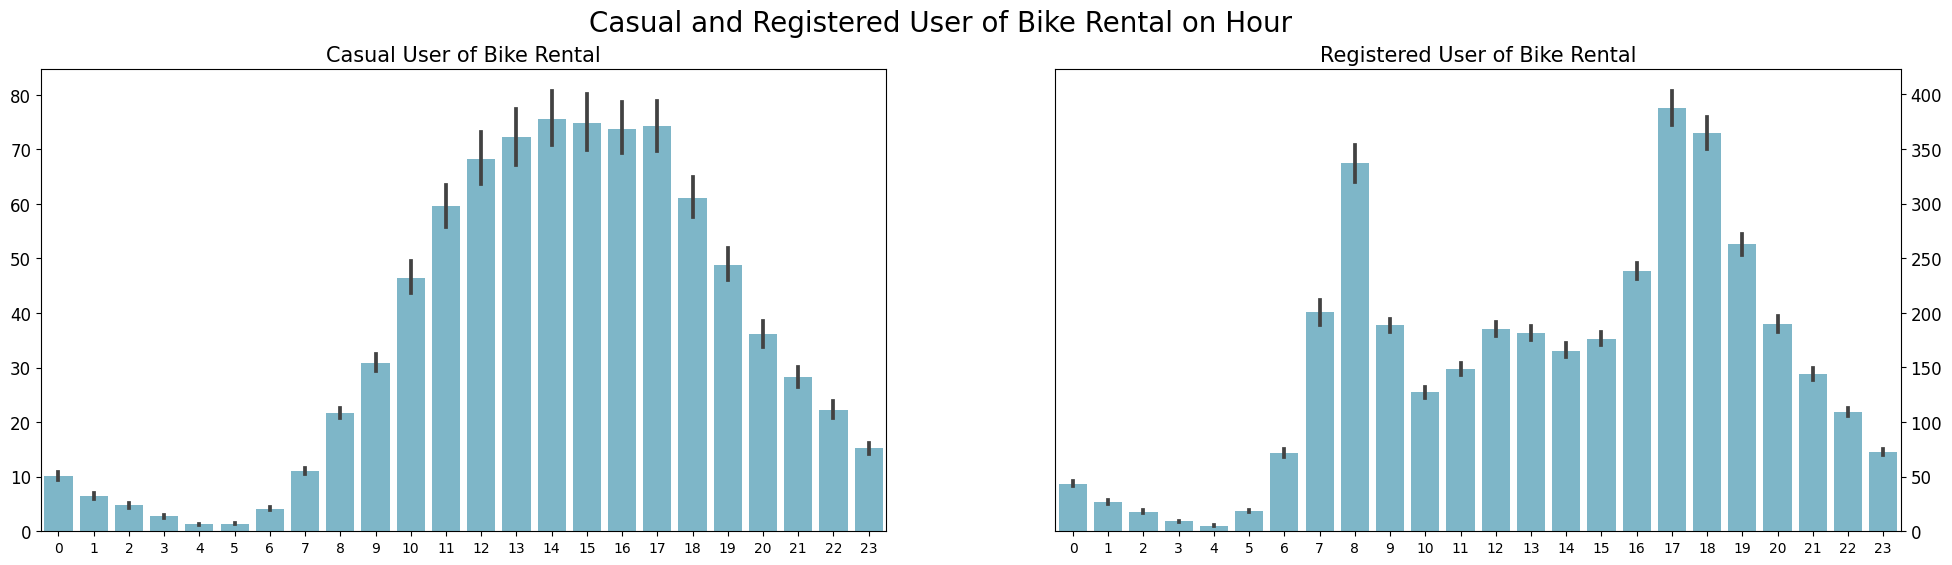

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(x="hr", y="casual", data=hour_df, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User of Bike Rental", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="hr", y="registered", data=hour_df, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User of Bike Rental", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Casual and Registered User of Bike Rental on Hour", fontsize=20)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

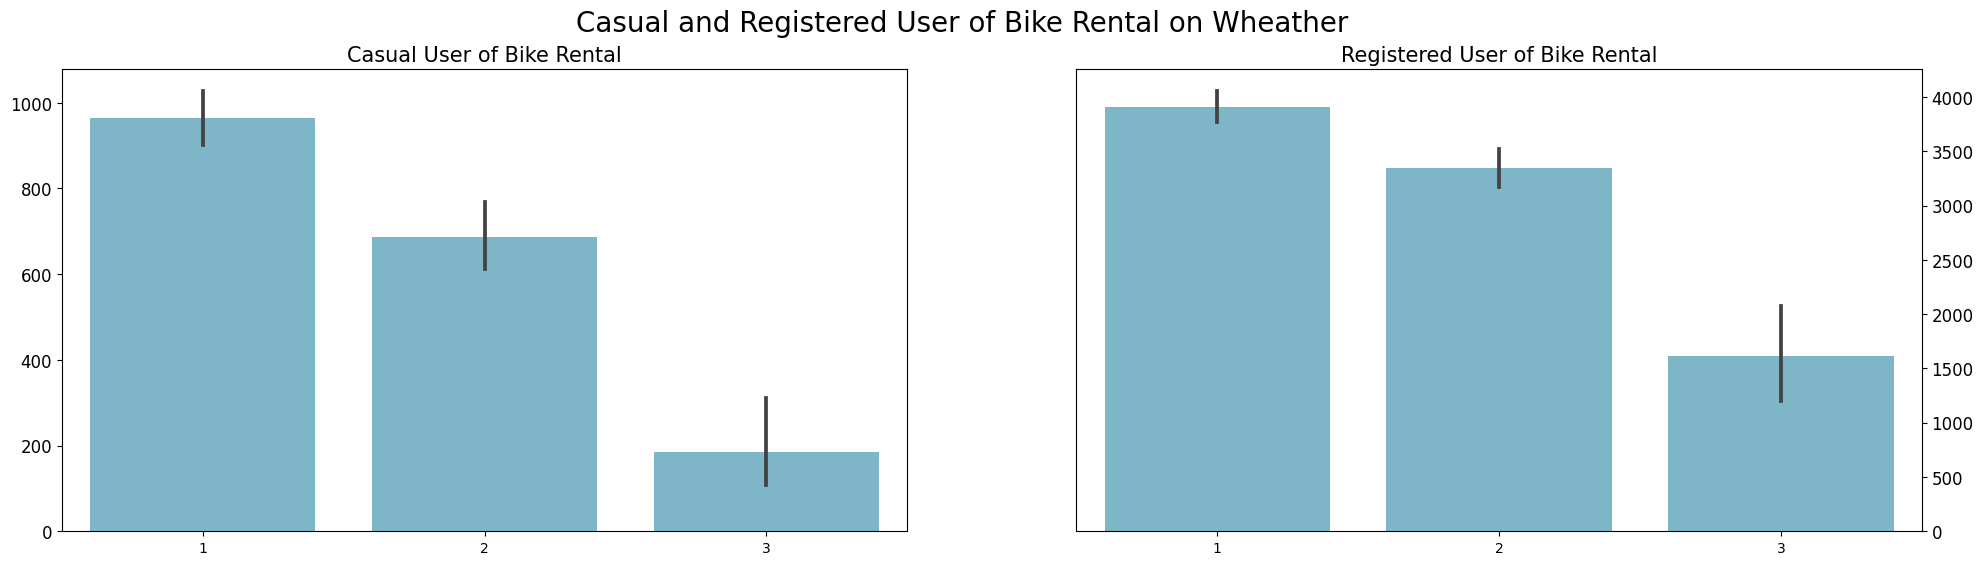

In [ ]:
# Bagaimana Cuaca Mempengaruhi Aktivitas Rental Sepeda?

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(x="weathersit", y="casual", data=day_df, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User of Bike Rental", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="weathersit", y="registered", data=day_df, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User of Bike Rental", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Casual and Registered User of Bike Rental on Wheather", fontsize=20)
plt.show()

### Pertanyaan 2: 

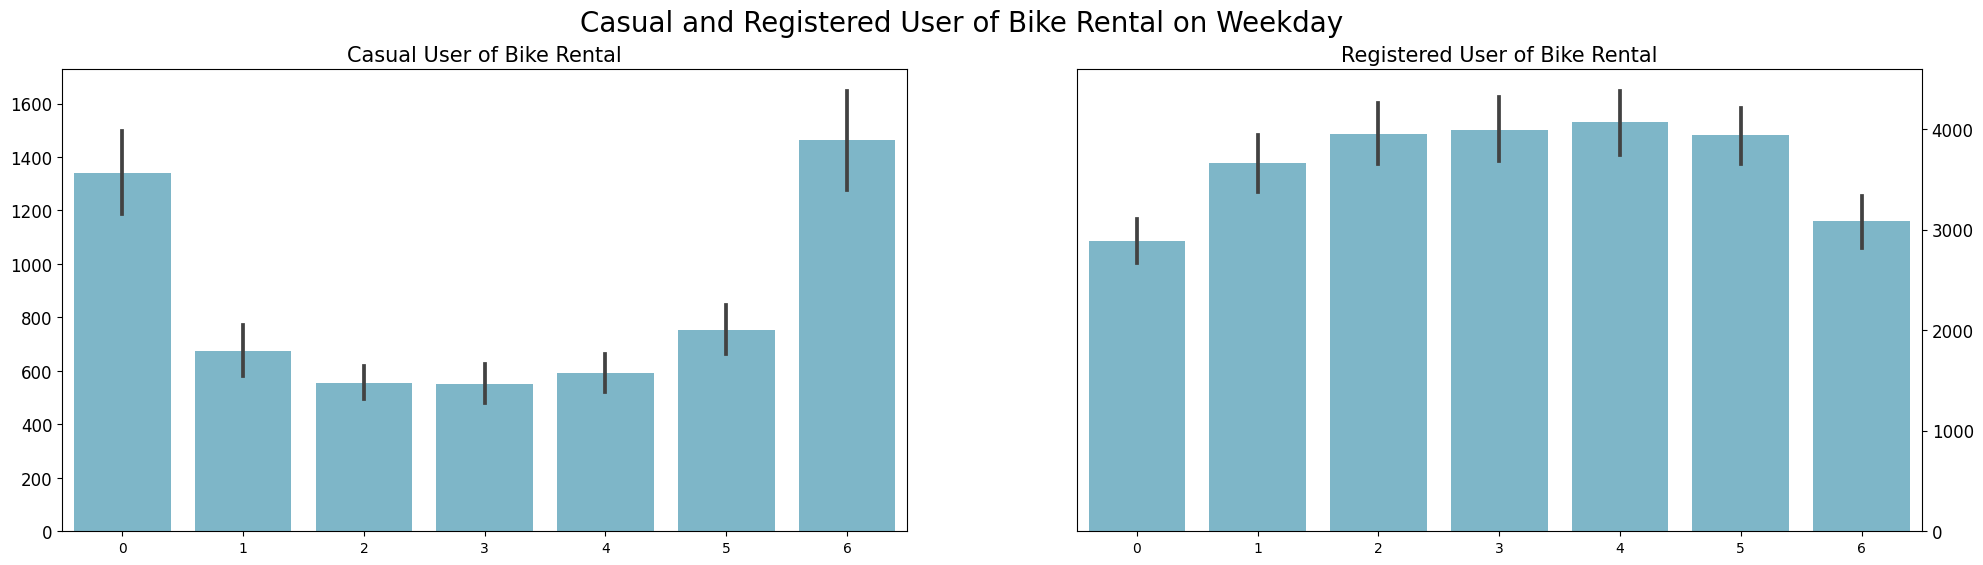

In [ ]:
# Apakah ada perbedaan perilaku harian antara Casual User dan Registered User?

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(x="weekday", y="casual", data=day_df, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User of Bike Rental", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="weekday", y="registered", data=day_df, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User of Bike Rental", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Casual and Registered User of Bike Rental on Weekday", fontsize=20)
plt.show()

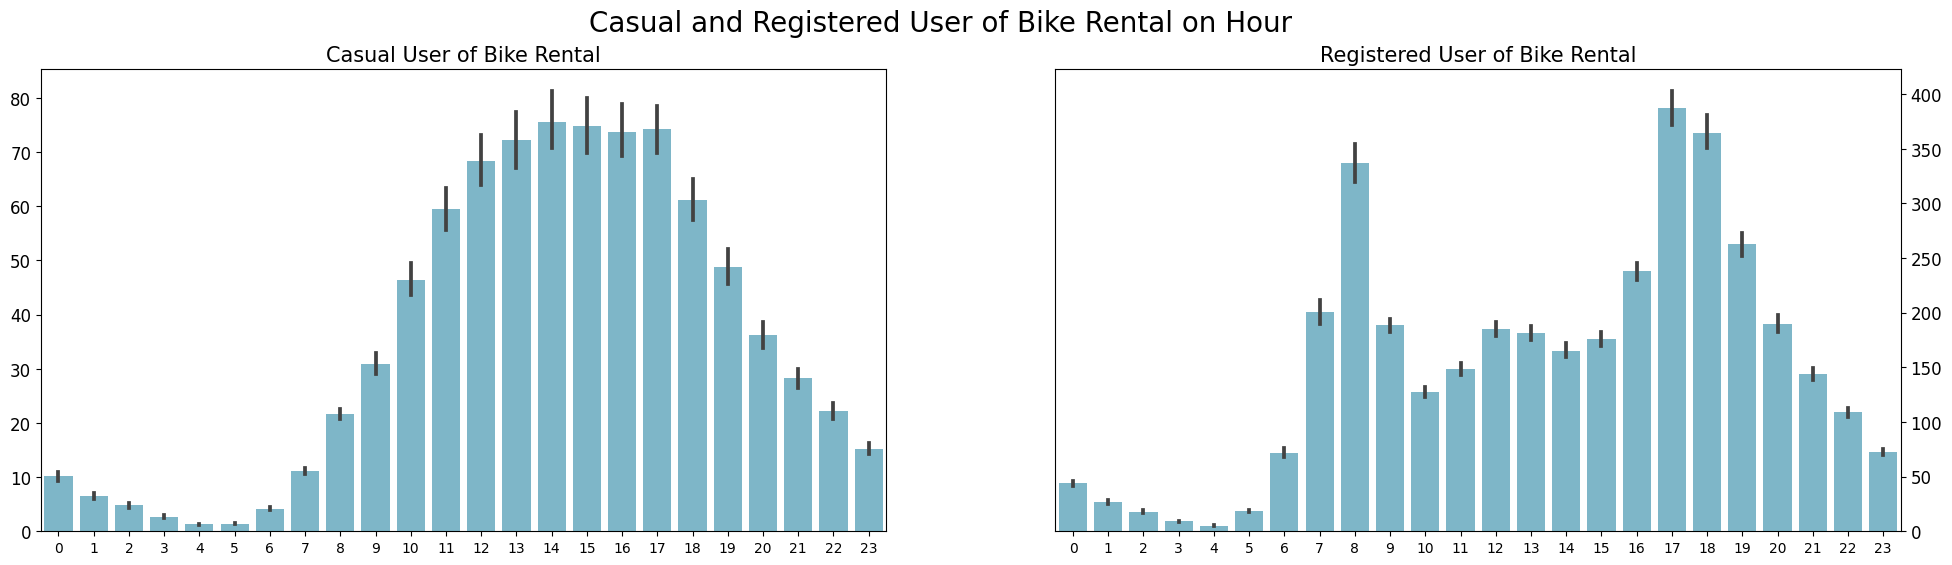

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(x="hr", y="casual", data=hour_df, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User of Bike Rental", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="hr", y="registered", data=hour_df, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User of Bike Rental", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Casual and Registered User of Bike Rental on Hour", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

1. Bagaimana Cuaca Mempengaruhi Aktivitas Rental Sepeda?

Secara general tidak ada perbedaan yang cukup mencolok antara casual user dengan registered user. Mereka lebih sedikit menggunakan sepeda ketika cuaca berada pada kategori 3 yaitu Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.

Pada cuaca seperti itu jumlah registered user yang menggunakan sepeda lebih banyak. Kemungkinan besar mereka menggunakan sepeda untuk aktivitas harian seperti bekerja.

Frekuensi penggunaan sepeda menurun baik registered user maupun casual user pada periode Desember sampai Februari dikarenakan pada periode tersebut adalah musim dingin

2. Apakah ada perbedaan perilaku harian antara Casual User dan Registered User?

Registered user lebih cenderung menggunakan sepeda saat hari kantor terlihat pada grafik sebelah kanan yang cenderung lebih banyak penyewaan pada periode weekday dan lebih banyak digunakaan saat memasuki jam kerja dan pulang kerja. Sebaliknya, casual user lebih cenderung menggunakan sepeda saat hari libur dan pada waktu untuk berekreasi sekitar jam 10 - 17.

Jika dilihat sekilas kuantitas penggunaan sepeda saat hari libur masih didominasi oleh registered user dan tentunya ada lonjakan yang cukup signifikan pada saat hari libur dan juga rentang waktu jam 17 sampai 18.

